In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/French_accidents/places.csv"
df = pd.read_csv(path, low_memory=False)

In [4]:
df.rename( columns= { "catr": "road_type", "voie": "road_num", "circ": "traffic_type", "nbv": "num_lanes", "vosp": "bike_lane_type",
                     "prof": "terrain_type", "plan": "curve_type", "pr1": "pr_distance", "lartpc": "central_width", "larrout": "width", "surf": "condition",
                      "infra": "infrastructure", "env1": "school"}, inplace=True)

In [5]:
df.count()

Num_Acc           839985
road_type         839984
road_num          780914
v1                332816
v2                 33953
traffic_type      839187
num_lanes         838195
pr                414770
pr_distance       413463
bike_lane_type    838345
terrain_type      838924
curve_type        838909
central_width     830440
width             831706
condition         838968
infrastructure    838707
situ              838983
school            838709
dtype: int64

In [6]:
df.head()

,Num_Acc,road_type,road_num,v1,v2,traffic_type,num_lanes,pr,pr_distance,bike_lane_type,terrain_type,curve_type,central_width,width,condition,infrastructure,situ,school
0,201600000001,3.0,39,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,NaN,NaN,1.0,0.0,NaN,NaN,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0


## Road Type

    1 - Highway

    2 - National Road

    3 - Departmental Road

    4 - Communal Way

    5 - Off public network

    6 - Parking lot open to public traffic

    9 - other


In [7]:
df['road_type'].value_counts()

4.0    425061
3.0    262690
2.0     67918
1.0     61077
9.0     16084
6.0      5520
5.0      1634
Name: road_type, dtype: int64

In [8]:
df['road_type'].isna().sum()

1

In [9]:
df['road_type'].fillna(9.0, inplace=True)

## Road number

In [10]:
df['road_num'].value_counts()

0        451032
1         22224
6          8953
7          8055
4          7173
          ...  
00CR7         1
2913          1
00D75         1
00D18         1
1560          1
Name: road_num, Length: 1087, dtype: int64

In [11]:
df.drop('road_num', axis=1, inplace=True)

## V1

Route number numeric index (?)

In [12]:
df['v1'].value_counts()

0.0    325698
2.0      3307
1.0      1020
3.0       768
6.0       461
4.0       396
7.0       392
9.0       295
8.0       247
5.0       232
Name: v1, dtype: int64

In [13]:
df['v1'].isna().sum()

507169

In [14]:
df.drop('v1', axis=1, inplace=True)

## V2

Letter alphanumeric index of road

In [15]:
df['v2'].value_counts()

A    20069
D     2200
N     1976
E     1942
B     1372
0     1091
C     1011
a      879
b      778
      537
F      263
e      213
S      177
G      140
1      134
R      114
L       99
2       92
P       77
J       71
H       70
3       70
M       63
K       52
Z       42
4       38
n       35
c       34
s       34
T       33
W       31
5       27
6       27
I       25
V       21
z       16
d       15
m       11
7       11
8       10
9        9
Y        7
O        7
Q        7
l        4
t        3
U        3
g        2
r        2
v        2
p        2
f        2
X        1
w        1
y        1
Name: v2, dtype: int64

In [16]:
df['v2'].isna().sum()

806032

In [17]:
df.drop('v2', axis=1, inplace=True)

## Traffic type

    1 - One way

    2 - Bidirectional

    3 - Separated carriageways

    4 - With variable assignment channels


In [18]:
df['traffic_type'].value_counts()

2.0    532823
1.0    149375
3.0    107855
0.0     44556
4.0      4578
Name: traffic_type, dtype: int64

In [19]:
df['traffic_type'].isna().sum()

798

Filling missing values with the most common value

In [20]:
df['traffic_type'].fillna(2.0, inplace=True)

## Number of lanes

In [21]:
df['traffic_type'].isna().sum()

0

<Axes: ylabel='Frequency'>

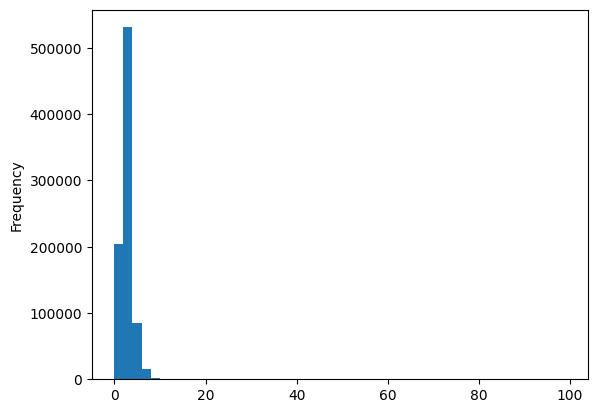

In [22]:
df['num_lanes'].plot(kind='hist', bins=50)

In [23]:
df['num_lanes'] = df['num_lanes'].apply(lambda x: 2.0 if x > 10 else x)

In [24]:
df['num_lanes'].fillna(2.0, inplace=True)

<Axes: ylabel='Frequency'>

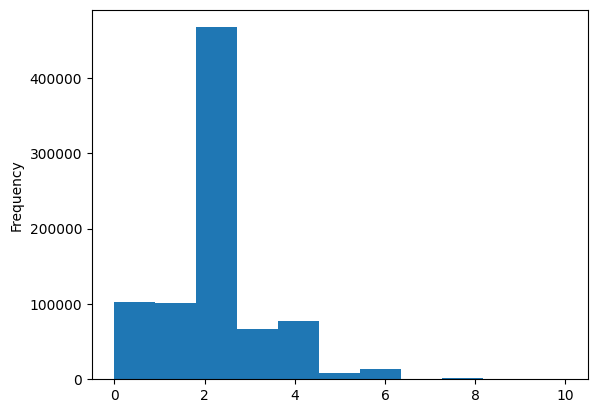

In [25]:
df['num_lanes'].plot(kind='hist', bins=11)

## Bike lane

    1 - Bike path

    2 - Cycle Bank

    3 - Reserved channel


In [26]:
df['bike_lane_type'].value_counts()

0.0    787021
3.0     23473
1.0     16570
2.0     11281
Name: bike_lane_type, dtype: int64

In [27]:
df['bike_lane_type'].isna().sum()

1640

In [28]:
df['bike_lane_type'].fillna(0.0, inplace=True)

## Terrain

    1 - Dish

    2 - Slope

    3 - Hilltop

    4- Hill bottom



In [29]:
df['terrain_type'].value_counts()

1.0    634776
2.0    114043
0.0     63894
3.0     15130
4.0     11081
Name: terrain_type, dtype: int64

In [30]:
df['terrain_type'].isna().sum()

1061

In [31]:
df['terrain_type'].fillna(1.0, inplace=True)

## PR number (?)

In [32]:
df['pr'].value_counts()

0.0       129543
1.0        29888
2.0        14437
3.0        11661
4.0         9761
           ...  
474.0          1
475.0          1
4000.0         1
2600.0         1
1125.0         1
Name: pr, Length: 736, dtype: int64

In [33]:
df['pr'].isna().sum()

425215

In [34]:
df.drop('pr', axis=1, inplace=True)

## PR distance (?)

In [35]:
df['pr_distance'].value_counts()

0.0       173181
500.0      25276
200.0      15199
800.0      14751
100.0      13998
           ...  
2101.0         1
1465.0         1
1278.0         1
1659.0         1
3437.0         1
Name: pr_distance, Length: 2127, dtype: int64

In [36]:
df['pr_distance'].isna().sum()

426522

In [37]:
df.drop('pr_distance', axis=1, inplace=True)

## Road curve

    1 - Straight part

    2 - Curved on the left

    3 - Curved right

    4 - In "S"


In [38]:
df['curve_type'].value_counts()

1.0    639903
2.0     68483
3.0     61946
0.0     57847
4.0     10730
Name: curve_type, dtype: int64

In [39]:
df['curve_type'].isna().sum()

1076

In [40]:
df['curve_type'].fillna(1.0, inplace=True)

## Central width

In [41]:
df['central_width'].value_counts()

0.0      699686
15.0      30770
10.0      18085
20.0      15641
30.0       7863
          ...  
206.0         1
446.0         1
915.0         1
950.0         1
625.0         1
Name: central_width, Length: 371, dtype: int64

In [42]:
df['central_width'].isna().sum()

9545

<Axes: ylabel='Frequency'>

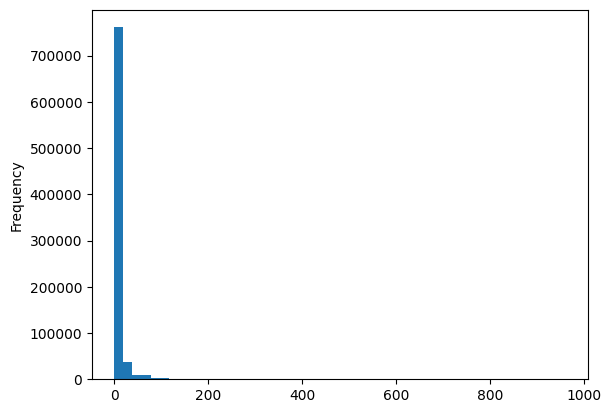

In [43]:
df['central_width'].plot(kind='hist', bins=50)

In [44]:
df.drop('central_width', axis=1, inplace=True)

## Width

In [45]:
df['width'].min()

-81.0

In [46]:
df['width'].max()

999.0

In [47]:
df['width'].isna().sum()

8279

In [71]:
df.drop('width', axis=1, inplace=True)

## Road condition

    1 - normal

    2 - wet

    3 - puddles

    4 - flooded

    5 - snow

    6 - mud

    7 - icy

    8 - fat - oil

    9 - other


In [53]:
df['condition'].value_counts()

1.0    652322
2.0    143254
0.0     26998
7.0      5474
9.0      4483
5.0      2643
8.0      2159
3.0       861
6.0       466
4.0       308
Name: condition, dtype: int64

In [54]:
df['condition'].isna().sum()

1017

In [55]:
df['condition'].fillna(1.0, inplace=True)

## Infrastructure

    1 - Underground - tunnel

    2 - Bridge - autopont

    3 - Exchanger or connection brace

    4 - Railway

    5 - Carrefour arranged

    6 - Pedestrian area

    7 - Toll zone


In [56]:
df['infrastructure'].value_counts()

0.0    747965
5.0     50330
3.0     12853
2.0     11720
1.0      6994
6.0      5299
4.0      3034
7.0       512
Name: infrastructure, dtype: int64

In [57]:
df['infrastructure'].isna().sum()

1278

In [58]:
df['infrastructure'].fillna(0.0, inplace=True)

## Accident situation

    1 - On the road

    2 - On emergency stop band

    3 - On the verge

    4 - On the sidewalk

    5 - On bike path


In [59]:
df['situ'].value_counts()

1.0    722069
3.0     48818
0.0     43291
4.0     14493
2.0      5191
5.0      5121
Name: situ, dtype: int64

In [60]:
df['situ'].isna().sum()

1002

In [61]:
df['situ'].fillna(0.0, inplace=True)

## Near school (?)

In [62]:
df['school'].value_counts()

0.0     477933
99.0    319986
3.0      40790
Name: school, dtype: int64

In [63]:
df['school'].isna().sum()

1276

In [64]:
df['school'].fillna(0.0, inplace=True)

In [65]:
df['school'] = df['school'].apply(lambda x: 2.0 if x==99.0 else x/3.0)

# Notes

## Problem points

* The meaning of the **PR** field (and by associatoin the **PR distance** field) and the **near school** field is not clear from neither the description nor the actual values present in the data. A lot of rows are also missing these, it might be best to ignore these fields.

* **Road number** and **V1** and **V2** most probably somehow correspond to the french road numbering system, but there are a large number of options and the meanings are not clear cut an there are a large number of missing rows for the latter two.

* Completely unrealistic values pop up in the **number of lanes**.

* **Width** and **central width** coloumn meanings are not exactly known.

## Categorical data

* There are a large number of columns which contain categorical data, these seem to be well generalizable via dummy columns.

In [72]:
df.head()

,Num_Acc,road_type,traffic_type,num_lanes,bike_lane_type,terrain_type,curve_type,condition,infrastructure,situ,school
0,201600000001,3.0,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,2.0
3,201600000004,4.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0
4,201600000005,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


<Axes: >

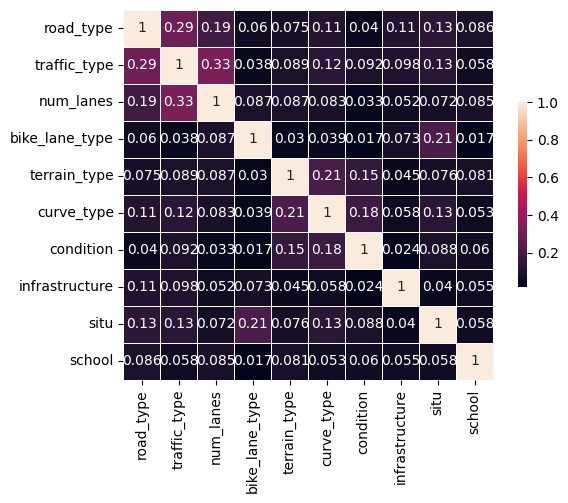

In [74]:
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats.contingency import association
import seaborn

def cramersv(a, b):
    return association(contingency_matrix(a, b))

corr = df.drop('Num_Acc', axis=1).corr(method=cramersv)
sns.heatmap(corr, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


In [76]:
df.to_csv('places_prepped.csv', index=False)